# Random

There's no way to tell what might be useful in here, but let's take an image, try things, and see what happens. I'll learn along the way.


### GrabCut Algorithm

[This](https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_grabcut/py_grabcut.html) looks like it could be interesting. This is one of a handful of graph based segmentation techniques.

Let's apply it to the violin example:

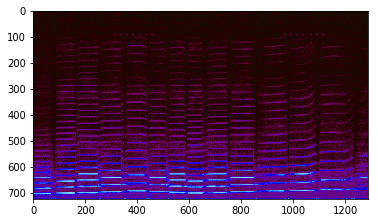

In [13]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

img = cv2.imread('violin.png')
mask = np.zeros(img.shape[:2],np.uint8)

bgdModel = np.zeros((1,65),np.float64)
fgdModel = np.zeros((1,65),np.float64)

height = img.shape[0]
width = img.shape[1] 

rect = (1,1,width,height)
cv2.grabCut(img,mask,rect,bgdModel,fgdModel,5,cv2.GC_INIT_WITH_RECT)

#mask2 = np.where((mask==2)|(mask==0),0,1).astype('uint8')
#img = img*mask2[:,:,np.newaxis]

plt.imshow(img)
plt.show()

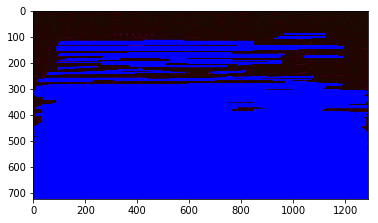

In [15]:
import numpy as np
import cv2

gray = cv2.imread('violin.png')
edges = cv2.Canny(gray,50,150,apertureSize = 3)
cv2.imwrite('edges-50-150.jpg',edges)
minLineLength=100
lines = cv2.HoughLinesP(image=edges,rho=1,theta=np.pi/180, threshold=100,lines=np.array([]), minLineLength=minLineLength,maxLineGap=80)

a,b,c = lines.shape
for i in range(a):
    cv2.line(gray, (lines[i][0][0], lines[i][0][1]), (lines[i][0][2], lines[i][0][3]), (0, 0, 255), 3, cv2.LINE_AA)
    cv2.imwrite('houghlines5.jpg',gray)
    
plt.imshow(gray)
plt.show()